In [324]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [325]:
df = pd.read_csv('sensor.csv')

In [326]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [327]:
#df.info() #220320 
df['timestamp'].min() #'2018-04-01 00:00:00'
#df['timestamp'].max() #'2018-08-31 23:59:00'

#data is captured hourly

'2018-04-01 00:00:00'

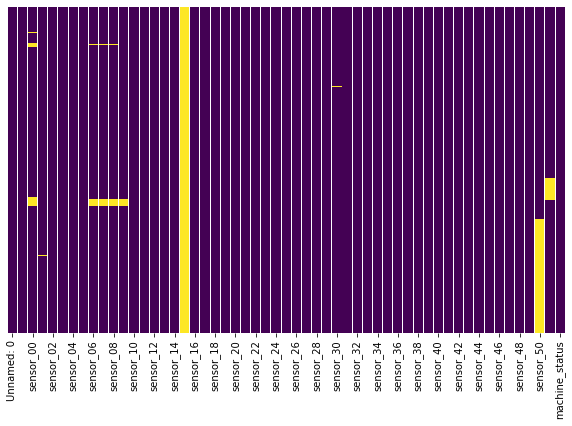

In [328]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False, cbar=False)
#'Unnamed:0' column is not needed
#also yellow marks represent missing data is there

In [329]:
# Drop duplicates
df = df.drop_duplicates()

In [330]:
#df.info() #no duplicate found

In [331]:
# Entire "sensor_15" column is NaN therefore remove it from data
df.drop(['sensor_15'], axis=1, inplace=True)

In [332]:
# Let's convert the data type of timestamp column to datatime format
#import warnings
#warnings.filterwarnings("ignore")
df['date'] = pd.to_datetime(df['timestamp'])

df.drop(['timestamp'], axis=1, inplace=True)

In [333]:
total =  df.isnull().count() #total by all feature
missing =  df.isnull().sum() #total by all feature
#type(missing) #pandas.core.series.Series
missingperc = (missing/total)*100
#missingperc[missingPerc>0].sort_values(ascending=False)
missingdf = pd.concat([total,missing,missingperc],axis=1, keys= ['total', 'totalmissing', 'missingperc'])
#missingdf
missingdf[missingperc > 0].sort_values(by='missingperc', ascending=False).index

Index(['sensor_50', 'sensor_51', 'sensor_00', 'sensor_07', 'sensor_08',
       'sensor_06', 'sensor_09', 'sensor_01', 'sensor_30', 'sensor_29',
       'sensor_32', 'sensor_18', 'sensor_17', 'sensor_22', 'sensor_25',
       'sensor_16', 'sensor_41', 'sensor_39', 'sensor_40', 'sensor_42',
       'sensor_38', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46',
       'sensor_47', 'sensor_48', 'sensor_49', 'sensor_14', 'sensor_26',
       'sensor_02', 'sensor_03', 'sensor_05', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_04', 'sensor_13', 'sensor_33', 'sensor_21',
       'sensor_19', 'sensor_20', 'sensor_23', 'sensor_34', 'sensor_24',
       'sensor_27', 'sensor_31', 'sensor_37', 'sensor_36', 'sensor_35',
       'sensor_28'],
      dtype='object')

In [334]:
df[df['sensor_51'].isnull()].count()

Unnamed: 0        15383
sensor_00         13049
sensor_01         15364
sensor_02         15364
sensor_03         15364
sensor_04         15364
sensor_05         15364
sensor_06         14614
sensor_07         14488
sensor_08         14715
sensor_09         14586
sensor_10         15364
sensor_11         15364
sensor_12         15364
sensor_13         15364
sensor_14         15367
sensor_16         15357
sensor_17         15342
sensor_18         15342
sensor_19         15372
sensor_20         15372
sensor_21         15372
sensor_22         15347
sensor_23         15372
sensor_24         15372
sensor_25         15352
sensor_26         15368
sensor_27         15372
sensor_28         15372
sensor_29         15372
sensor_30         15372
sensor_31         15372
sensor_32         15372
sensor_33         15372
sensor_34         15372
sensor_35         15372
sensor_36         15372
sensor_37         15372
sensor_38         15356
sensor_39         15356
sensor_40         15356
sensor_41       

In [335]:
missing_sensor_list = ['sensor_50', 'sensor_51', 'sensor_00', 'sensor_07', 'sensor_08',
       'sensor_06', 'sensor_09', 'sensor_01', 'sensor_30', 'sensor_29',
       'sensor_32', 'sensor_18', 'sensor_17', 'sensor_22', 'sensor_25',
       'sensor_16', 'sensor_41', 'sensor_39', 'sensor_40', 'sensor_42',
       'sensor_38', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46',
       'sensor_47', 'sensor_48', 'sensor_49', 'sensor_14', 'sensor_26',
       'sensor_02', 'sensor_03', 'sensor_05', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_04', 'sensor_13', 'sensor_33', 'sensor_21',
       'sensor_19', 'sensor_20', 'sensor_23', 'sensor_34', 'sensor_24',
       'sensor_27', 'sensor_31', 'sensor_37', 'sensor_36', 'sensor_35',
       'sensor_28']

for s in missing_sensor_list:
    m = df[s].mean()
    df[s] = df[s].apply(lambda d: m if pd.isnull(d) else d)

In [336]:
total =  df.isnull().count() #total by all feature
missing =  df.isnull().sum() #total by all feature
#type(missing) #pandas.core.series.Series
missingperc = (missing/total)*100
#missingperc[missingPerc>0].sort_values(ascending=False)
missingdf = pd.concat([total,missing,missingperc],axis=1, keys= ['total', 'totalmissing', 'missingperc'])
#missingdf
missingdf[missingperc > 0].sort_values(by='missingperc', ascending=False)

,total,totalmissing,missingperc


In [337]:
#Nothing is missing now

In [338]:
df['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [339]:
df[df['machine_status'] == 'BROKEN']

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,date
17155,17155,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,16.869210,...,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,401.909700,324.652800,BROKEN,2018-04-12 21:55:00
24510,24510,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,14.185470,...,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,177.662000,183.738400,BROKEN,2018-04-18 00:30:00
69318,69318,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,15.147570,...,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,246.238400,257.523100,BROKEN,2018-05-19 03:18:00
77790,77790,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,15.943290,...,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,220.196800,267.361100,BROKEN,2018-05-25 00:30:00
128040,128040,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,15.183740,...,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,32.407406,202.699667,BROKEN,2018-06-28 22:00:00
141131,141131,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,0.036169,...,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,192.129600,174.768500,BROKEN,2018-07-08 00:11:00
166440,166440,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,15.697340,...,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,183.049260,205.729200,BROKEN,2018-07-25 14:00:00


In [340]:
#Dimensionality reduction using PCA

In [341]:
# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Extract the names of the numerical columns
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)

x= df.drop(['date','machine_status'], axis=1)
pipeline.fit(x)

#df2 = df.drop(['machine_status'], axis=1)
#names=df2.columns
#x = df[names]

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

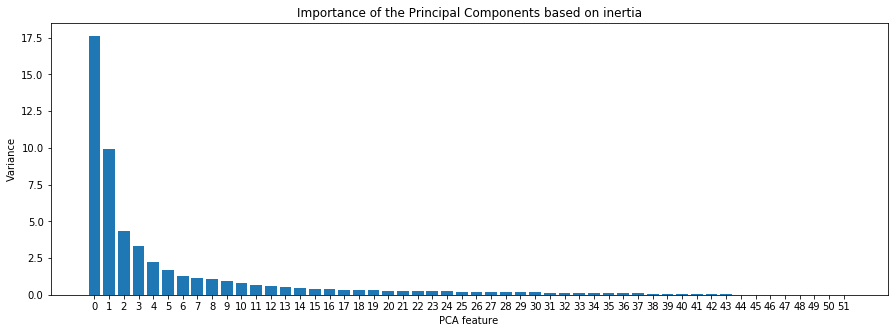

In [342]:
# Plot the principal components against their inertia
features = range(pca.n_components_)
plt.figure(figsize=(15, 5))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [343]:
# Calculate PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [344]:
principalDf

,pc1,pc2
0,-110159.178812,-362.175792
1,-110158.178826,-362.172088
2,-110157.043832,-404.610738
3,-110156.025244,-407.805872
4,-110155.098562,-404.080885
5,-110154.120660,-387.765769
6,-110153.045426,-407.188410
7,-110152.065288,-407.693388
8,-110151.088012,-402.953592
9,-110150.105928,-410.585597


In [345]:
# Calculate IQR for the 1st principal component (pc1)
q1_pc1, q3_pc1 = principalDf['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1

# Calculate upper and lower bounds for outlier for pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

# Filter out the outliers from the pc1
principalDf['anomaly_pc1'] = ((principalDf['pc1']>upper_pc1) | (principalDf['pc1']<lower_pc1)).astype('int')

In [346]:
# Calculate IQR for the 1st principal component (pc2)
q1_pc2, q3_pc2 = principalDf['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2

# Calculate upper and lower bounds for outlier for pc1
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

# Filter out the outliers from the pc1
principalDf['anomaly_pc2'] = ((principalDf['pc2']>upper_pc2) | (principalDf['pc2']<lower_pc2)).astype('int')

In [347]:
df['pc1'] = principalDf['pc1']
df['pc2'] = principalDf['pc2']

df['anomaly_pc1'] = principalDf['anomaly_pc1']
df['anomaly_pc2'] = principalDf['anomaly_pc2']

In [348]:
df.head()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,date,pc1,pc2,anomaly_pc1,anomaly_pc2
0,0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:00:00,-110159.178812,-362.175792,0,0
1,1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:01:00,-110158.178826,-362.172088,0,0
2,2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,155.9606,67.12963,241.3194,203.7037,NORMAL,2018-04-01 00:02:00,-110157.043832,-404.610738,0,0
3,3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,155.9606,66.84028,240.4514,203.1250,NORMAL,2018-04-01 00:03:00,-110156.025244,-407.805872,0,0
4,4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,158.2755,66.55093,242.1875,201.3889,NORMAL,2018-04-01 00:04:00,-110155.098562,-404.080885,0,0


In [349]:
df['anomaly_pc1'].value_counts()

0    220320
Name: anomaly_pc1, dtype: int64

In [350]:
df['anomaly_pc2'].value_counts()

0    194816
1     25504
Name: anomaly_pc2, dtype: int64

In [351]:
df.set_index('date', inplace=True)

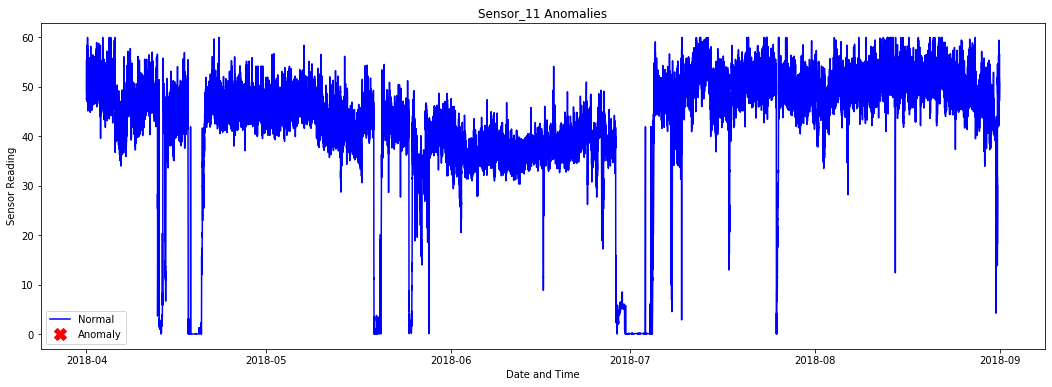

In [352]:
# Let's plot the outliers from pc1 on top of the sensor_11 and see where they occured in the time series
a = df[df['anomaly_pc1'] == 1] #anomaly

plt.figure(figsize=(18,6))
plt.plot(df['sensor_11'], color='blue', label='Normal')

plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')

plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor_11 Anomalies')

plt.legend(loc='best')
plt.show();

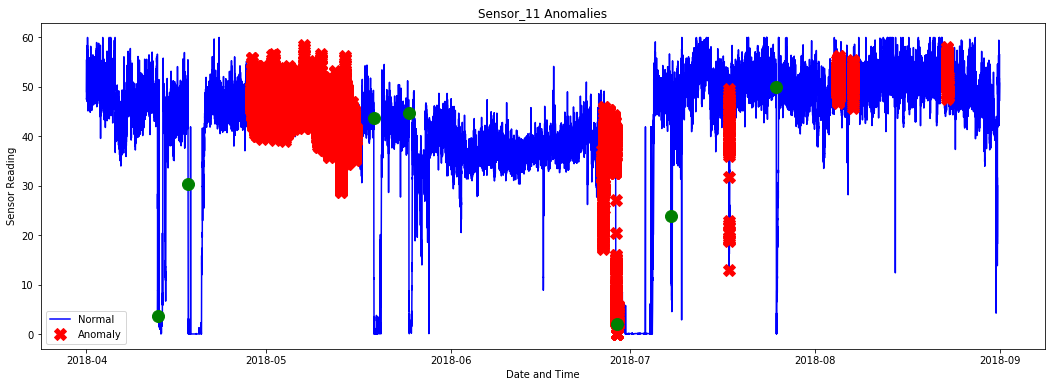

In [353]:
# Extract the readings from the BROKEN state of the pump
broken = df[df['machine_status']=='BROKEN']

# Let's plot the outliers from pc1 on top of the sensor_11 and see where they occured in the time series
a = df[df['anomaly_pc2'] == 1] #anomaly

plt.figure(figsize=(18,6))
plt.plot(df['sensor_11'], color='blue', label='Normal')

plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.plot(broken['sensor_11'], linestyle='none', marker='o', color='green', markersize=12)
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor_11 Anomalies')

plt.legend(loc='best')
plt.show();

#####

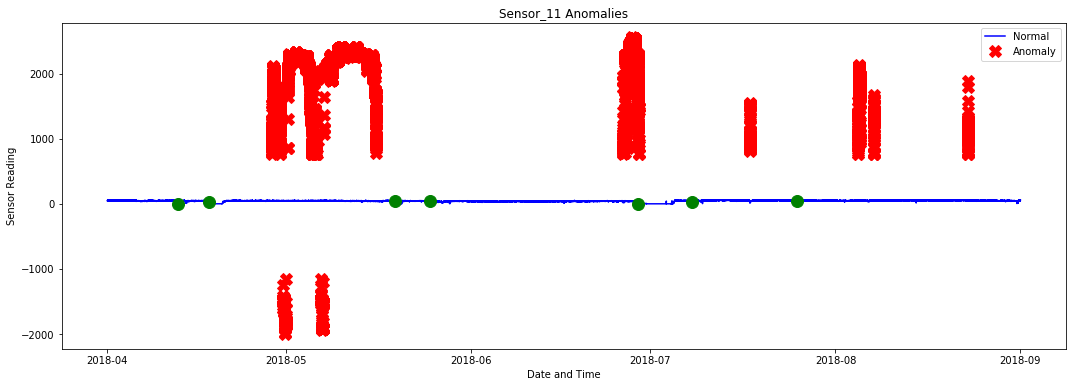

In [354]:
# Extract the readings from the BROKEN state of the pump
broken = df[df['machine_status']=='BROKEN']

# Let's plot the outliers from pc1 on top of the sensor_11 and see where they occured in the time series
a = df[df['anomaly_pc2'] == 1] #anomaly

plt.figure(figsize=(18,6))
plt.plot(df['sensor_11'], color='blue', label='Normal')

plt.plot(a['pc2'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.plot(broken['sensor_11'], linestyle='none', marker='o', color='green', markersize=12)
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor_11 Anomalies')

plt.legend(loc='best')
plt.show();

In [355]:
df[df['anomaly_pc1'] == 1]

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,pc1,pc2,anomaly_pc1,anomaly_pc2
date,,,,,,,,,,,,,,,,,,,,,


In [359]:
all_sensors = ['sensor_00','sensor_01','sensor_02','sensor_03','sensor_04','sensor_05','sensor_06','sensor_07','sensor_08','sensor_09','sensor_10','sensor_11','sensor_12','sensor_13','sensor_14','sensor_16','sensor_17','sensor_18','sensor_19','sensor_20','sensor_21','sensor_22','sensor_23','sensor_24','sensor_25','sensor_26','sensor_27','sensor_28','sensor_29','sensor_30','sensor_31','sensor_32','sensor_33','sensor_34','sensor_35','sensor_36','sensor_37','sensor_38','sensor_39','sensor_40','sensor_41','sensor_42','sensor_43','sensor_44','sensor_45','sensor_46','sensor_47','sensor_48','sensor_49','sensor_50','sensor_51']

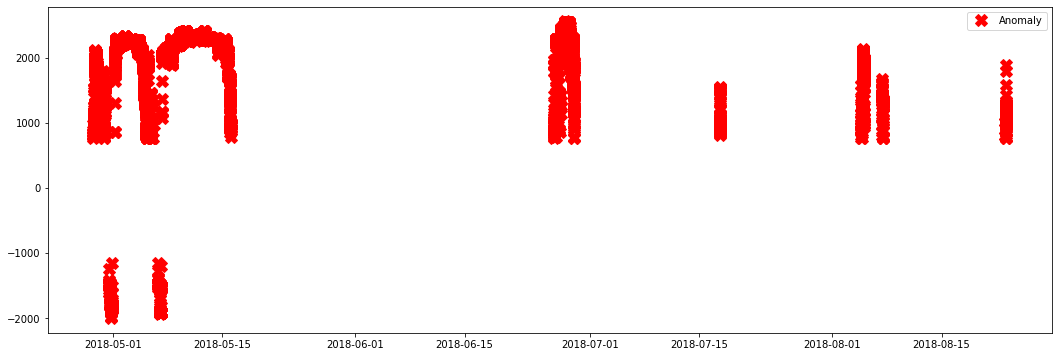

Text(0, 0.5, 'Sensor Reading')

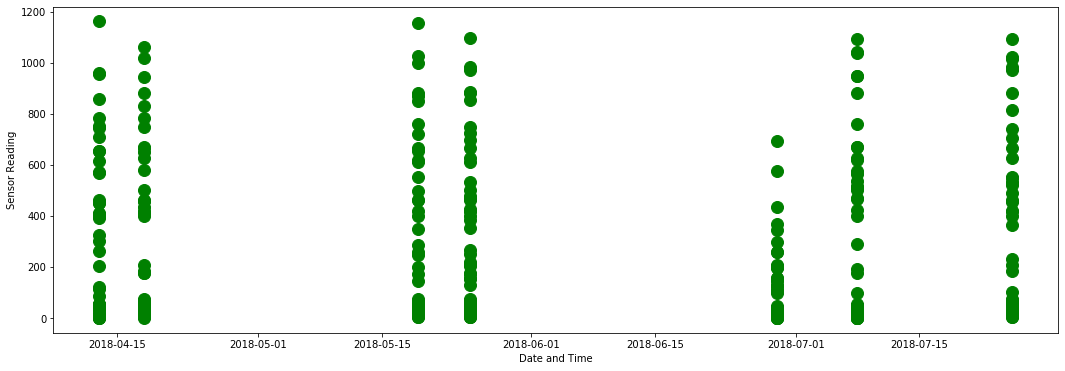

In [363]:
# Extract the readings from the BROKEN state of the pump
broken = df[df['machine_status']=='BROKEN']

# Let's plot the outliers from pc1 on top of the sensor_11 and see where they occured in the time series
a = df[df['anomaly_pc2'] == 1] #anomaly

plt.figure(figsize=(18,6))
#plt.plot(df['sensor_11'], color='blue', label='Normal')

plt.plot(a['pc2'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
#plt.plot(broken['sensor_11'], linestyle='none', marker='o', color='green', markersize=12)
#plt.xlabel('Date and Time')
#plt.ylabel('Sensor Reading')
#plt.title('Sensor_11 Anomalies')

plt.legend(loc='best')
plt.show();

plt.figure(figsize=(18,6))
for s in all_sensors:
    plt.plot(broken[s], linestyle='none', marker='o', color='green', markersize=12, label=s)
#    m = df[s].mean()
#    df[s] = df[s].apply(lambda d: m if pd.isnull(d) else d)
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')

<Figure size 1296x432 with 0 Axes>

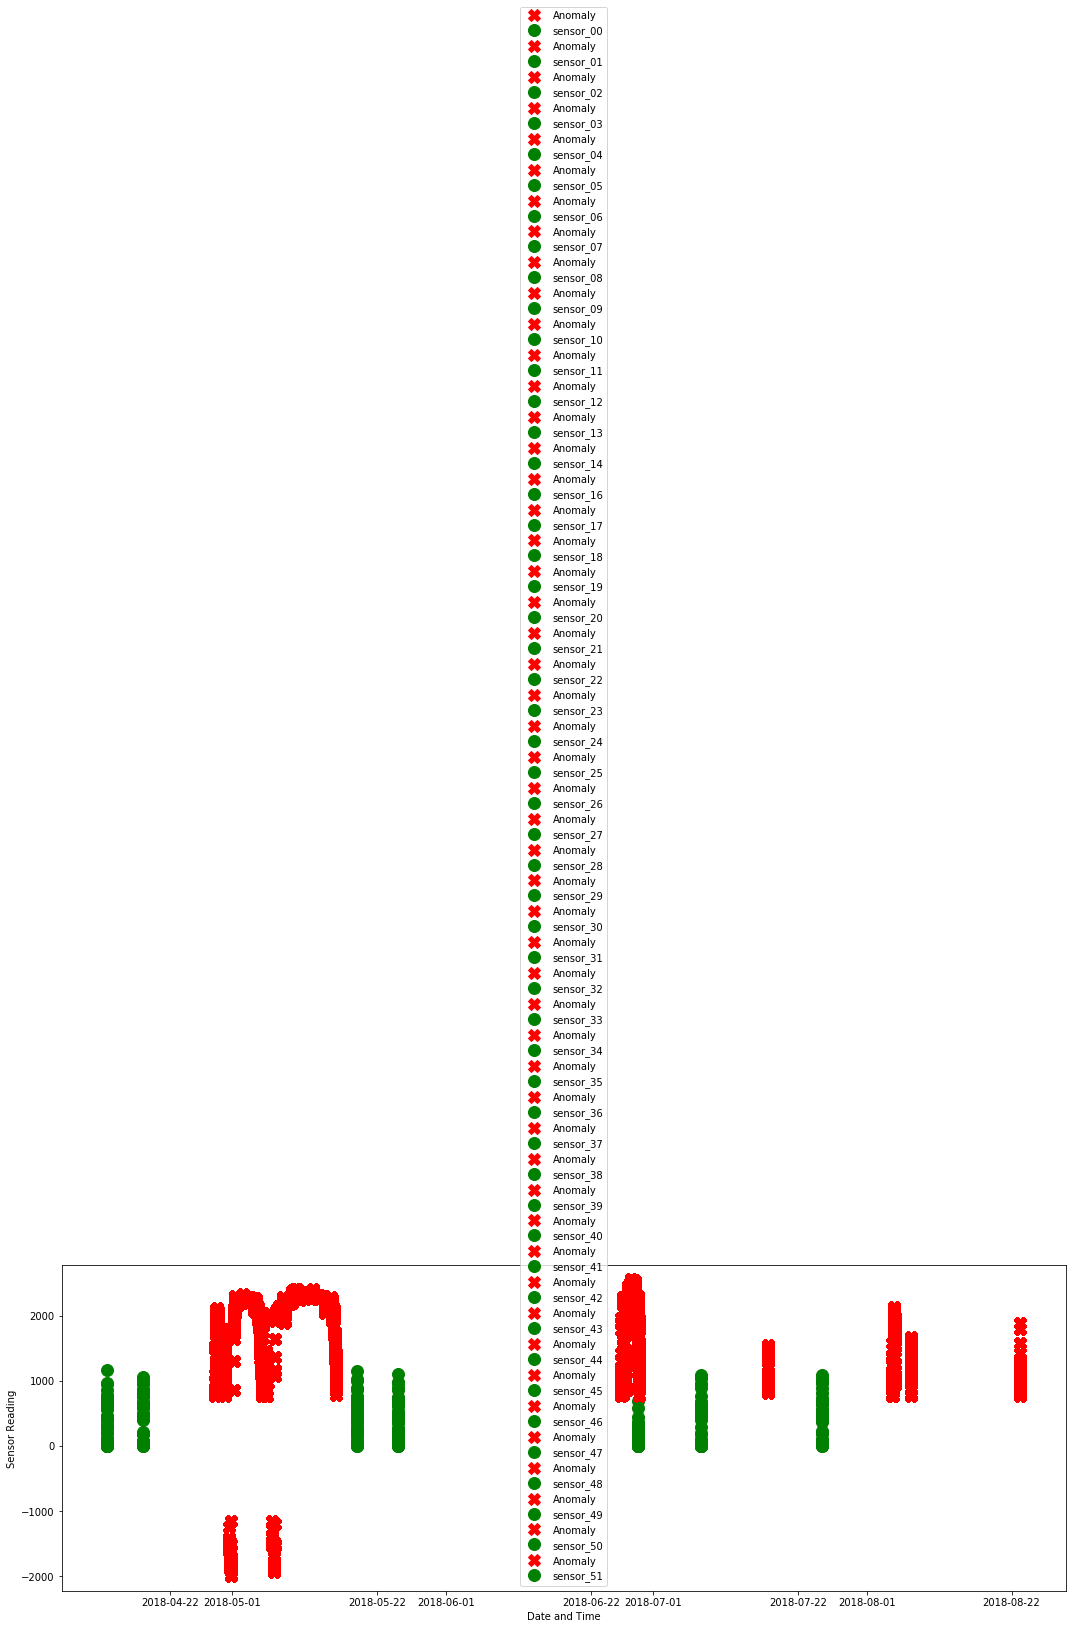

In [365]:
# Extract the readings from the BROKEN state of the pump
broken = df[df['machine_status']=='BROKEN']

# Let's plot the outliers from pc1 on top of the sensor_11 and see where they occured in the time series
a = df[df['anomaly_pc2'] == 1] #anomaly

plt.figure(figsize=(18,6))
#plt.plot(df['sensor_11'], color='blue', label='Normal')

#plt.plot(a['pc2'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
#plt.plot(broken['sensor_11'], linestyle='none', marker='o', color='green', markersize=12)
#plt.xlabel('Date and Time')
#plt.ylabel('Sensor Reading')
#plt.title('Sensor_11 Anomalies')

plt.figure(figsize=(18,6))
for s in all_sensors:
    plt.plot(a['pc2'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
    plt.plot(broken[s], linestyle='none', marker='o', color='green', markersize=12, label=s)
#    m = df[s].mean()
#    df[s] = df[s].apply(lambda d: m if pd.isnull(d) else d)
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')

plt.legend(loc='best')
plt.show();
